## Analisis del problema

El objetivo principal es distinguir entre donantes de sangre sanos y pacientes con Hepatitis C en función de las variables de laboratorio y los datos demográficos proporcionados. Este problema es de clasificación, ya que implica categorizar a los individuos en dos grupos: aquellos que tienen Hepatitis C y aquellos que no.

# Entendimiento de los datos

`Category` (string): Indica el estado de salud del donante, todos son donantes sanos (0 = Blood Donor).

`Age` (float): Edad de los donantes, todos tienen 32 años.

`Sex` (string): Sexo de los donantes, todos son masculinos (m).

`ALB` - Albúmina (float): Indicador de salud hepática, valores entre 38.5 y 50.9 g/L.

`ALP` - Fosfatasa Alcalina (float): Enzima hepática y ósea, valores entre 41.3 y 86.3 U/L.

`ALT` - Alanina Aminotransferasa (float): Marcador de daño hepático, valores entre 7.7 y 36.2 U/L.

`AST` - Aspartato Aminotransferasa (float): Otro indicador de daño hepático, valores entre 17.5 y 52.6 U/L.

`BIL` - Bilirrubina (float): Marcador de descomposición de glóbulos rojos, valores entre 3.9 y 35.2 µmol/L.

`CHE` - Colinesterasa (float): Refleja la función hepática, valores entre 5.46 y 11.17 U/L.

`CHOL` - Colesterol (float): Nivel de colesterol en sangre, valores entre 3.23 y 5.20 mmol/L.

`CREA` - Creatinina (float): Indicador de función renal, valores entre 74 y 111 µmol/L.

`GGT` - Gamma Glutamil Transferasa (float): Enzima que indica daño hepático, valores entre 12.1 y 33.8 U/L.

`PROT` - Proteínas Totales (float): Cantidad total de proteínas en sangre, valores entre 68.7 y 79.3 g/L.


# Exploracion de datos

## Librerias

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")


## Cargar el archivo

In [18]:
# Load the dataset
df = pd.read_csv('../datasets/hepatitis.csv')

# Verificar la forma del DataFrame y las primeras filas
print(df.shape)  # Debe mostrar (615, 14)
print(df.head())  # Para verificar los datos


(615, 14)
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [19]:
# Preprocessing
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Seleccionar solo columnas numéricas
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'm' else 0)  # Ejemplo para convertir 'Sex'

category_map = {
    "0=Blood Donor": 0,
    "1=Hepatitis": 1,
    "2=Fibrosis": 2,
    "3=Cirrhosis": 3,
    "0s=suspect Blood Donor": 4,
}
df['Category'] = df['Category'].map(category_map)

X = df.drop(columns=['Category'])
y = df['Category']

print(y.isnull().sum())  # Debe mostrar 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)


0
(430, 13) (185, 13)


In [4]:
# Look for the best k
Ks = 20 
mean_acc = []  
std_acc = [] 

for k in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())

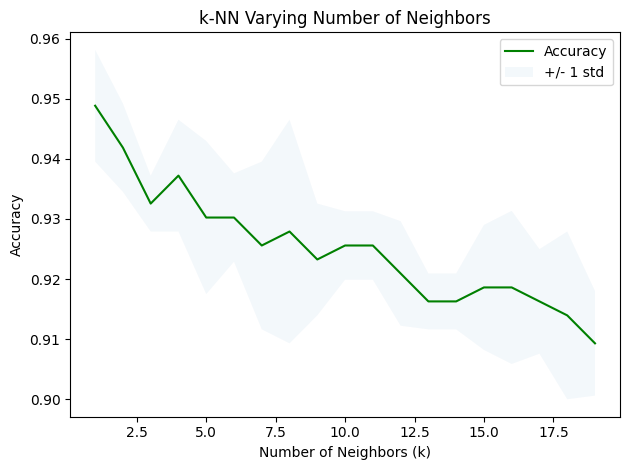

In [5]:
# Plot the accuracy
plt.plot(range(1, Ks), mean_acc, 'g', label='Accuracy')
plt.fill_between(range(1, Ks), np.array(mean_acc) - 1 * np.array(std_acc),
                 np.array(mean_acc) + 1 * np.array(std_acc), alpha=0.05)
plt.legend(('Accuracy', '+/- 1 std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.title('k-NN Varying Number of Neighbors')
plt.tight_layout()
plt.show()

# Modelo Machine Learning

In [6]:
# Entrenar el modelo con el mejor valor de k
best_k = np.argmax(mean_acc) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = np.mean(y_pred == y_test)

print(f"La precisión del modelo k-NN con k={best_k} es: {accuracy:.2f}")


La precisión del modelo k-NN con k=1 es: 0.92


# Evaluaciones


In [7]:

# Contar instancias de cada clase en y_test
class_counts = y_test.value_counts()
print("\nContador de clases en y_test:")
print(class_counts)



Contador de clases en y_test:
Category
0    153
3     11
1     10
2      8
4      3
Name: count, dtype: int64


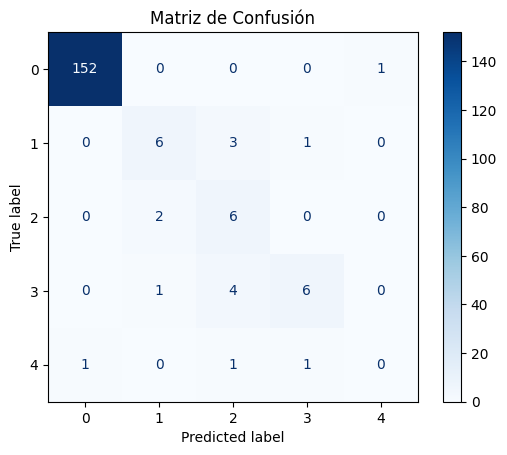

In [8]:
# Correlational Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot(cmap=plt.cm.Blues)  
plt.title('Matriz de Confusión')
plt.show()


## Resultados

Precisión del Modelo (Accuracy): 92%
Esto significa que el 92% de las predicciones realizadas por el modelo fueron correctas. Este es un buen indicador de que el modelo tiene un rendimiento razonable, pero aún hay espacio para mejorar, especialmente en clases específicas.